## Import packages and load data

In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline.backend_inline
import seaborn as sns

In [3]:
# setup display

pd.set_option('display.max_columns', 30)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 100)

In [4]:
# increase resolution

matplotlib_inline.backend_inline.set_matplotlib_formats('svg', 'png')

In [5]:
data = pd.read_csv('data/Uncleaned_DS_jobs.csv', index_col='index')

In [6]:
df = data.copy()

In [7]:
df.head()

Job Title               Salary Estimate  \
index                                                    
0      Sr Data Scientist  $137K-$171K (Glassdoor est.)   
1         Data Scientist  $137K-$171K (Glassdoor est.)   
2         Data Scientist  $137K-$171K (Glassdoor est.)   
3         Data Scientist  $137K-$171K (Glassdoor est.)   
4         Data Scientist  $137K-$171K (Glassdoor est.)   

                                                                                           Job Description  \
index                                                                                                        
0      Description\n\nThe Senior Data Scientist is responsible for defining, building, and improving st...   
1      Secure our Nation, Ignite your Future\n\nJoin the top Information Technology and Analytic profes...   
2      Overview\n\n\nAnalysis Group is one of the largest international economics consulting firms, wit...   
3      JOB DESCRIPTION:\n\nDo you have a passion for Data and Machine Learning? Do you dream of working...   
4      Data Scientist\nAffinity Solutions / Marketing Cloud seeks smart, curious, technically savvy can...   

       Rating             Company Name       Location            Headquarters  \
index                                                                           
0         3.1         Healthfirst\n3.1   New York, NY            New York, NY   
1         4.2             ManTech\n4.2  Chantilly, VA             Herndon, VA   
2         3.8      Analysis Group\n3.8     Boston, MA              Boston, MA   
3         3.5             INFICON\n3.5     Newton, MA  Bad Ragaz, Switzerland   
4         2.9  Affinity Solutions\n2.9   New York, NY            New York, NY   

                          Size  Founded        Type of ownership  \
index                                                              
0       1001 to 5000 employees     1993   Nonprofit Organization   
1      5001 to 10000 employees     1968         Company - Public   
2       1001 to 5000 employees     1981  Private Practice / Firm   
3        501 to 1000 employees     2000         Company - Public   
4          51 to 200 employees     1998        Company - Private   

                                    Industry             Sector  \
index                                                             
0                         Insurance Carriers          Insurance   
1                     Research & Development  Business Services   
2                                 Consulting  Business Services   
3      Electrical & Electronic Manufacturing      Manufacturing   
4                    Advertising & Marketing  Business Services   

                          Revenue  \
index                               
0        Unknown / Non-Applicable   
1          $1 to $2 billion (USD)   
2      $100 to $500 million (USD)   
3      $100 to $500 million (USD)   
4        Unknown / Non-Applicable   

                                                  Competitors  
index                                                          
0                     EmblemHealth, UnitedHealth Group, Aetna  
1                                                          -1  
2                                                          -1  
3      MKS Instruments, Pfeiffer Vacuum, Agilent Technologies  
4                        Commerce Signals, Cardlytics, Yodlee

In [8]:
df.shape

(672, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Estimate    672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Location           672 non-null    object 
 6   Headquarters       672 non-null    object 
 7   Size               672 non-null    object 
 8   Founded            672 non-null    int64  
 9   Type of ownership  672 non-null    object 
 10  Industry           672 non-null    object 
 11  Sector             672 non-null    object 
 12  Revenue            672 non-null    object 
 13  Competitors        672 non-null    object 
dtypes: float64(1), int64(1), object(12)
memory usage: 78.8+ KB


From info() function we can find that there is no non-null cell in this dataset, but we should keep an eye out for other ways of representing missing values.

## Data cleaning and transformation

### Rename the less frequent categories in Job Title as Other

In [10]:
df['Job Title'].value_counts().head(20)

Data Scientist                                                                                      337
Data Engineer                                                                                        26
Senior Data Scientist                                                                                19
Machine Learning Engineer                                                                            16
Data Analyst                                                                                         12
Senior Data Analyst                                                                                   6
Senior Data Engineer                                                                                  5
Data Science Software Engineer                                                                        4
ENGINEER - COMPUTER SCIENTIST - RESEARCH COMPUTER SCIENTIST - SIGNAL PROCESSING - SAN ANTONIO OR      4
Data Scientist - TS/SCI FSP or CI Required                      

In [11]:
df['Job Title'].nunique()

172

In [12]:
counts = df['Job Title'].value_counts()
counts[counts==1].count()

96

There are 172 different job titles, but the most frequently used titles (counts greater than 4) are Data Scientist, Sr. Data Scientist, Data Engineer, Sr. Data Engineer, Data Analyst, Sr. Data Analyst and Machine Learning Engineer, 7 in total. 96 different DS job titles appearing only once.

Now we replace the other 165 titles with 'Other'.

In [13]:
counts = df['Job Title'].value_counts()
df['Job Title'].replace(counts[counts <= 4].index, 'Other', inplace=True)

df['Job Title'].value_counts()

Data Scientist               337
Other                        251
Data Engineer                 26
Senior Data Scientist         19
Machine Learning Engineer     16
Data Analyst                  12
Senior Data Analyst            6
Senior Data Engineer           5
Name: Job Title, dtype: int64

### Covert Salary to integers

In [14]:
df['Salary Estimate'] = df['Salary Estimate'].str.rstrip(' (Glassdoor est.)').str.rstrip('(Employ')
df['Salary Estimate'].unique()

array(['$137K-$171K', '$75K-$131K', '$79K-$131K', '$99K-$132K',
       '$90K-$109K', '$101K-$165K', '$56K-$97K', '$79K-$106K',
       '$71K-$123K', '$90K-$124K', '$91K-$150K', '$141K-$225K',
       '$145K-$225K', '$79K-$147K', '$122K-$146K', '$112K-$116K',
       '$110K-$163K', '$124K-$198K', '$79K-$133K', '$69K-$116K',
       '$31K-$56K', '$95K-$119K', '$212K-$331K', '$66K-$112K',
       '$128K-$201K', '$138K-$158K', '$80K-$132K', '$87K-$141K',
       '$92K-$155K', '$105K-$167K'], dtype=object)

There are 30 different salary ranges, but there is overlap between these ranges. Now we randomly select integers from given salary ranges as the new column **Salary Estimate**.

In [15]:
salary_range = df['Salary Estimate'].str.split('-', expand=True).apply(lambda x: x.str.lstrip('$').str.rstrip('K')).astype(int)
df[['Min_Salary', 'Max_Salary']] = salary_range*1000

# rename Salary Estimate as Salary Range
df.rename(columns={'Salary Estimate': 'Salary Range'}, inplace=True)

# select a random integer from salary range as the Salary Estimate column
np.random.seed(9)
df['Salary Estimate'] = salary_range.apply(lambda x: random.randint(x[0], x[1]), axis=1)*1000

In [16]:
df[['Salary Range', 'Min_Salary', 'Max_Salary', 'Salary Estimate']].head(5)

Salary Range  Min_Salary  Max_Salary  Salary Estimate
index                                                      
0      $137K-$171K      137000      171000           155000
1      $137K-$171K      137000      171000           144000
2      $137K-$171K      137000      171000           147000
3      $137K-$171K      137000      171000           167000
4      $137K-$171K      137000      171000           144000

### Extract information from Job Description

In [17]:
key_words = ['python', 'sql', 'excel', 'tableau', 'power bi', 
             'hadoop', 'spark', 'aws', 'big data']
counts_df = pd.DataFrame()

# count frequencies a key word appears in Job Description column
for i in range(0, len(key_words)):
    counts = df['Job Description'].str.lower().str.count(key_words[i])
    counts_df[key_words[i]] = counts
    
counts_df.head()

python  sql  excel  tableau  power bi  hadoop  spark  aws  big data
index                                                                     
0           0    0      0        0         0       0      0    2         0
1           0    1      0        0         0       1      0    0         1
2           6    0      2        0         0       0      0    2         0
3           1    2      1        0         0       0      0    1         0
4           1    3      1        0         0       0      0    0         0

In [18]:
# add counts_df to df

df[key_words] = counts_df.applymap(lambda x: 1 if x!=0 else 0)

In [19]:
# capitalize the first letter of [key_words] columns

for col in key_words:
    df.rename(columns={col: col.capitalize()}, inplace=True)

### Remove Rating from Company Name

In [20]:
df['Company Name'] = df['Company Name'].str.split('\n', expand=True)[0]
df['Company Name'].head()

index
0           Healthfirst
1               ManTech
2        Analysis Group
3               INFICON
4    Affinity Solutions
Name: Company Name, dtype: object

### Seperate Locatin as City and State

In [21]:
df[['City', 'State']] = df['Location'].str.split(', ', expand=True)[[0, 1]]

In [22]:
df.drop(columns='Location', inplace=True) # drop column Location

In [23]:
df['State'].unique()

array(['NY', 'VA', 'MA', 'CA', 'IL', 'MO', 'WA', 'DC', None, 'TN', 'TX',
       'PA', 'AZ', 'WI', 'GA', 'FL', 'NE', 'KS', 'NH', 'NJ', 'LA', 'OH',
       'IN', 'MD', 'CO', 'UT', 'OR', 'MI', 'SC', 'MS', 'AL', 'RI', 'IA',
       'MN', 'OK', 'CT', 'NC', 'DE', 'Anne Arundel', 'WV'], dtype=object)

In [24]:
# update Anne Arundel as MD since Anne Arundel is located in the U.S. state of Maryland

df['State'] = df['State'].apply(lambda x: 'MD' if x=='Anne Arundel' else x)

### Create Company_Age using Founded

In [25]:
df['Founded'].unique()

array([1993, 1968, 1981, 2000, 1998, 2010, 1996, 1990, 1983, 2014, 2012,
       2016, 1965, 1973, 1986, 1997, 2015, 1945, 1988, 2017, 2011, 1967,
       1860, 1992, 2003, 1951, 2005, 2019, 1925, 2008, 1999, 1978, 1966,
       1912, 1958, 2013, 1849, 1781, 1926, 2006, 1994, 1863, 1995,   -1,
       1982, 1974, 2001, 1985, 1913, 1971, 1911, 2009, 1959, 2007, 1939,
       2002, 1961, 1963, 1969, 1946, 1957, 1953, 1948, 1850, 1851, 2004,
       1976, 1918, 1954, 1947, 1955, 2018, 1937, 1917, 1935, 1929, 1820,
       1952, 1932, 1894, 1960, 1788, 1830, 1984, 1933, 1880, 1887, 1970,
       1942, 1980, 1989, 1908, 1853, 1875, 1914, 1898, 1956, 1977, 1987,
       1896, 1972, 1949, 1962])

In [26]:
# Replace -1 with NaN

df['Founded'].replace({-1: np.nan}, inplace=True)

In [27]:
df['Company_Age'] = datetime.now().year - df['Founded']

In [28]:
df.drop(columns='Founded', inplace=True) # drop column Founded

### Deal with -1 (and Unknow) cells for columns including them

By observing the dataset, it's not hard to find that for a certain columns, '-1' or 'Unknown' are used to represent Null values. In this case, we will replace '-1' with None.

In [29]:
# find columns with -1 represented as Null

filt = df.apply(lambda x: x.str.contains('-1|Unknown', na=False), axis=1)
filt.sum().loc[filt.sum() > 0]

Job Description       47
Company Name           1
Headquarters          31
Size                  44
Type of ownership     31
Industry              71
Sector                71
Revenue              240
Competitors          501
dtype: int64

In [30]:
cols = ['Company Name', 'Headquarters', 'Size', 'Type of ownership', 
        'Industry', 'Sector', 'Revenue', 'Competitors']
df[cols] = df[cols].applymap(lambda x: None if x=='-1' else x)

### Convert columns Size and Revenue from categorical to numerical

In [31]:
# size
df['Size'].unique()

array(['1001 to 5000 employees', '5001 to 10000 employees',
       '501 to 1000 employees', '51 to 200 employees', '10000+ employees',
       '201 to 500 employees', '1 to 50 employees', None, 'Unknown'],
      dtype=object)

In [32]:
df['Size_numeric'] = df['Size'].map({'1 to 50 employees': 1, '51 to 200 employees': 2,
                                     '201 to 500 employees': 3, '501 to 1000 employees': 4,
                                     '1001 to 5000 employees': 5, '5001 to 10000 employees': 6,
                                     '10000+ employees': 7})

In [33]:
# revenue
df['Revenue'].unique()

array(['Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$100 to $500 million (USD)', '$10+ billion (USD)',
       '$2 to $5 billion (USD)', '$500 million to $1 billion (USD)',
       '$5 to $10 billion (USD)', '$10 to $25 million (USD)',
       '$25 to $50 million (USD)', '$50 to $100 million (USD)',
       '$1 to $5 million (USD)', '$5 to $10 million (USD)',
       'Less than $1 million (USD)', None], dtype=object)

In [34]:
df['Revenue_numeric'] = df['Revenue'].map({'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2,
                                           '$5 to $10 million (USD)': 3, '$10 to $25 million (USD)': 4,
                                           '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6,
                                           '$100 to $500 million (USD)': 7, '$500 million to $1 billion (USD)': 8,
                                           '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)': 10,
                                           '$5 to $10 billion (USD)': 11, '$10+ billion (USD)': 12})

## Exploratory Data Analysis (EDA) & Data Visualization

In [35]:
cleaned_df = df.copy()

In [36]:
cleaned_df.head()

Job Title Salary Range  \
index                                
0               Other  $137K-$171K   
1      Data Scientist  $137K-$171K   
2      Data Scientist  $137K-$171K   
3      Data Scientist  $137K-$171K   
4      Data Scientist  $137K-$171K   

                                                                                           Job Description  \
index                                                                                                        
0      Description\n\nThe Senior Data Scientist is responsible for defining, building, and improving st...   
1      Secure our Nation, Ignite your Future\n\nJoin the top Information Technology and Analytic profes...   
2      Overview\n\n\nAnalysis Group is one of the largest international economics consulting firms, wit...   
3      JOB DESCRIPTION:\n\nDo you have a passion for Data and Machine Learning? Do you dream of working...   
4      Data Scientist\nAffinity Solutions / Marketing Cloud seeks smart, curious, technically savvy can...   

       Rating        Company Name            Headquarters  \
index                                                       
0         3.1         Healthfirst            New York, NY   
1         4.2             ManTech             Herndon, VA   
2         3.8      Analysis Group              Boston, MA   
3         3.5             INFICON  Bad Ragaz, Switzerland   
4         2.9  Affinity Solutions            New York, NY   

                          Size        Type of ownership  \
index                                                     
0       1001 to 5000 employees   Nonprofit Organization   
1      5001 to 10000 employees         Company - Public   
2       1001 to 5000 employees  Private Practice / Firm   
3        501 to 1000 employees         Company - Public   
4          51 to 200 employees        Company - Private   

                                    Industry             Sector  \
index                                                             
0                         Insurance Carriers          Insurance   
1                     Research & Development  Business Services   
2                                 Consulting  Business Services   
3      Electrical & Electronic Manufacturing      Manufacturing   
4                    Advertising & Marketing  Business Services   

                          Revenue  \
index                               
0        Unknown / Non-Applicable   
1          $1 to $2 billion (USD)   
2      $100 to $500 million (USD)   
3      $100 to $500 million (USD)   
4        Unknown / Non-Applicable   

                                                  Competitors  Min_Salary  \
index                                                                       
0                     EmblemHealth, UnitedHealth Group, Aetna      137000   
1                                                        None      137000   
2                                                        None      137000   
3      MKS Instruments, Pfeiffer Vacuum, Agilent Technologies      137000   
4                        Commerce Signals, Cardlytics, Yodlee      137000   

       Max_Salary  Salary Estimate  Python  Sql  Excel  Tableau  Power bi  \
index                                                                       
0          171000           155000       0    0      0        0         0   
1          171000           144000       0    1      0        0         0   
2          171000           147000       1    0      1        0         0   
3          171000           167000       1    1      1        0         0   
4          171000           144000       1    1      1        0         0   

       Hadoop  Spark  Aws  Big data       City State  Company_Age  \
index                                                               
0           0      0    1         0   New York    NY         30.0   
1           1      0    0         1  Chantilly    VA         55.0   
2           0      0    1         0     Boston

In [37]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 0 to 671
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          672 non-null    object 
 1   Salary Range       672 non-null    object 
 2   Job Description    672 non-null    object 
 3   Rating             672 non-null    float64
 4   Company Name       672 non-null    object 
 5   Headquarters       641 non-null    object 
 6   Size               645 non-null    object 
 7   Type of ownership  645 non-null    object 
 8   Industry           601 non-null    object 
 9   Sector             601 non-null    object 
 10  Revenue            645 non-null    object 
 11  Competitors        171 non-null    object 
 12  Min_Salary         672 non-null    int64  
 13  Max_Salary         672 non-null    int64  
 14  Salary Estimate    672 non-null    int64  
 15  Python             672 non-null    int64  
 16  Sql                672 non

There actually are missing values within some string-type columns, espeacially for column Competitors, 501 out of 672 cells are Null, thus, we should drop this column when analyzing data. However, missing values themselves may include implicit information. But for this scenario, we'll just ignore this column.

In [38]:
cleaned_df.columns

Index(['Job Title', 'Salary Range', 'Job Description', 'Rating',
       'Company Name', 'Headquarters', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Competitors', 'Min_Salary', 'Max_Salary',
       'Salary Estimate', 'Python', 'Sql', 'Excel', 'Tableau', 'Power bi',
       'Hadoop', 'Spark', 'Aws', 'Big data', 'City', 'State', 'Company_Age',
       'Size_numeric', 'Revenue_numeric'],
      dtype='object')

In [39]:
# cleaned_df.to_csv('data/cleaned_dsjobs.csv', index=True)

## Min, Median and Max Salaray Estimate grouped by different Sectors, Industries and Job Titles

In [40]:
grps = cleaned_df.groupby(['Sector', 'Industry', 'Job Title'])

# get a specific group by passing a tuple of indexes, return a dataframe
grps.get_group(('Insurance', 'Insurance Agencies & Brokerages', 'Data Scientist'))

Job Title Salary Range  \
index                                
346    Data Scientist  $122K-$146K   
474    Data Scientist    $31K-$56K   

                                                                                           Job Description  \
index                                                                                                        
346    Deepen understanding and usage of data across the enterprise.\n\nAt Ameritas , fulfilling life i...   
474    Deepen understanding and usage of data across the enterprise.\n\nAt Ameritas , fulfilling life i...   

       Rating                  Company Name Headquarters  \
index                                                      
346       3.0  Ameritas Life Insurance Corp  Lincoln, NE   
474       3.0  Ameritas Life Insurance Corp  Lincoln, NE   

                         Size  Type of ownership  \
index                                              
346    1001 to 5000 employees  Company - Private   
474    1001 to 5000 employees  Company - Private   

                              Industry     Sector                 Revenue  \
index                                                                       
346    Insurance Agencies & Brokerages  Insurance  $2 to $5 billion (USD)   
474    Insurance Agencies & Brokerages  Insurance  $2 to $5 billion (USD)   

      Competitors  Min_Salary  Max_Salary  Salary Estimate  Python  Sql  \
index                                                                     
346          None      122000      146000           123000       0    0   
474          None       31000       56000            55000       0    0   

       Excel  Tableau  Power bi  Hadoop  Spark  Aws  Big data        City  \
index                                                                       
346        0        0         0       0      0    0         0  Cincinnati   
474        0        0         0       0      0    0         0  Cincinnati   

      State  Company_Age  Size_numeric  Revenue_numeric  
index                                                    
346      OH        136.0           5.0             10.0  
474      OH        136.0           5.0             10.0

In [41]:
stat_results = grps['Salary Estimate'].agg(['min', 'median', 'max']).astype(int).sort_values(by='median', ascending=False) # return a dataframe
stat_results

min  \
Sector                             Industry                                 Job Title                           
Media                              Publishing                               Data Scientist             244000   
Travel & Tourism                   Hotels, Motels, & Resorts                Data Scientist             222000   
Retail                             Food & Beverage Stores                   Data Scientist             208000   
Insurance                          Insurance Carriers                       Senior Data Scientist      195000   
Manufacturing                      Electrical & Electronic Manufacturing    Data Scientist             167000   
Consumer Services                  Health, Beauty, & Fitness                Data Scientist             155000   
Information Technology             IT Services                              Data Analyst               187000   
Government                         State & Regional Agencies                Data Scientist             171000   
Media                              Video Games                              Data Scientist             169000   
Business Services                  Research & Development                   Senior Data Analyst        165000   
Retail                             Other Retail Stores                      Data Scientist             155000   
Aerospace & Defense                Aerospace & Defense                      Data Engineer              157000   
Government                         Federal Agencies                         Other                       91000   
Insurance                          Insurance Carriers                       Data Engineer              154000   
Education                          Colleges & Universities                  Other                      154000   
Information Technology             Enterprise Software & Network Solutions  Senior Data Analyst        145000   
Real Estate                        Real Estate                              Data Scientist             147000   
Business Services                  Architectural & Engineering Services     Data Scientist             107000   
Information Technology             Internet                                 Senior Data Scientist      148000   
Manufacturing                      Chemical Manufacturing                   Other                      148000   
Business Services                  Staffing & Outsourcing                   Senior Data Scientist      145000   
                                   Advertising & Marketing                  Senior Data Engineer       143000   
                                                                            Data Scientist              72000   
                                   Wholesale                                Data Scientist             113000   
Government                         Federal Agencies                         Data Engineer              137000   
Aerospace & Defense                Aerospace & Defense                      Other                       53000   
Manufacturing                      Transportation Equipment Manufacturing   Data Scientist              79000   
Business Services                  Advertising & Marketing                  Senior Data Scientist      107000   
                                   Research & Development                   Data Scientist             123000   
Finance                            Banks & Credit Unions                    Data Analyst               133000   
Retail                             Consumer Electronics & Appliances Stores Data Scientist             122000   
Media                              Video Games                              Data Analyst               132000   
Business Services                  Consulting                               Other                       88000   
Oil, Gas, Energy & Utilities       Energy                                   Other                       93000   
Business Services                  Con

The above data is sorted by median salary estimate descendingly, we can conclude that it's not necessary to be in specific industries to get a high salary, as a practitioner related to data science.

In [42]:
# locate specific values by passing multiple indexes

stat_results.loc[('Insurance', 'Insurance Agencies & Brokerages', ['Data Analyst', 'Data Scientist']), ['median', 'max']]

median     max
Sector    Industry                        Job Title                     
Insurance Insurance Agencies & Brokerages Data Analyst     94000  106000
                                          Data Scientist   89000  123000

Text(0.5, 1.0, 'Bar Chart for Min, Median and Max Salary($) categorized by Job Title')

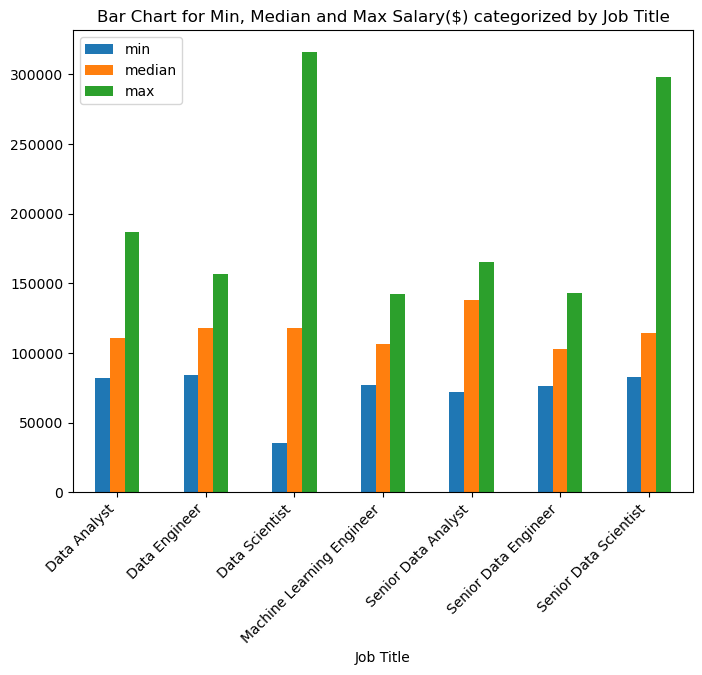

In [43]:
# Now we group data by Job Titles only and calculate min, median and max Salary Estimates

stat_results_jt = cleaned_df.groupby('Job Title')['Salary Estimate'].agg(['min', 'median', 'max']).apply(round)
stat_results_jt = stat_results_jt.sort_index() # sort rows by indexes alphabetically
stat_results_jt.drop('Other', inplace=True) # drop a row using index Other

stat_results_jt.plot(kind='bar')
plt.gcf().set_size_inches(8, 6)
plt.xticks(rotation=45, ha='right') # rotate x-axis label
plt.title('Bar Chart for Min, Median and Max Salary($) categorized by Job Title', fontsize=12)

From the above multiple bar chart, we notice that the range of salary for Data Scientist is the largest, among the selected seven different types of job titles. This could mean that the a data scientist can be involved in both simple and complex job duties, from data collection and cleaning to data analysis using statistical models.

Senior data analysts have the highest median salary; More generally, senior positions have higher min salary compared to junior positions.

Text(0.5, 1.0, 'Bar Chart for Min, Median and Max Salary($) categorized by Sector')

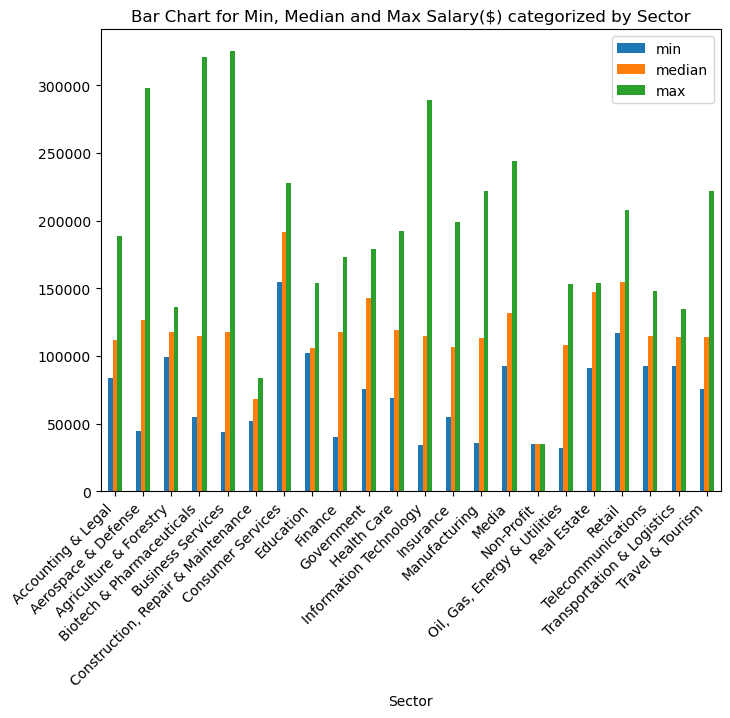

In [44]:
# Now we group by Sector only and calculate min, median and max Salary Estimates

stat_results_sector = cleaned_df.groupby('Sector')['Salary Estimate'].agg(['min', 'median', 'max']).apply(round)
stat_results_sector = stat_results_sector.sort_index() # sort rows by indexes alphabetically

stat_results_sector.plot(kind='bar')
plt.gcf().set_size_inches(8, 6)
plt.xticks(rotation=45, ha='right') # rotate x-axis label
plt.title('Bar Chart for Min, Median and Max Salary($) categorized by Sector', fontsize=12)

## Choropleth Map with Median Salary Estimate and #Job Postings

reference: https://plotly.com/python/choropleth-maps/

In [45]:
# group by States

agg_df = cleaned_df.groupby('State')['Salary Estimate'].agg(['median', 'count']).apply(round)
agg_df.reset_index(inplace=True)

agg_df.head()

State    median  count
0    AL  137500.0      4
1    AZ  147500.0      4
2    CA  119000.0    165
3    CO  110000.0     10
4    CT  108000.0      4

In [46]:
import plotly.graph_objects as go

In [47]:
# create two go.Figure objects

fig1 = go.Figure(data = go.Choropleth(
    locations = agg_df['State'], # Spatial coordinates
    z = agg_df['median'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Greens',
    marker_line_color = 'white', # line markers between states
    colorbar_title = 'Median Salary')
)
fig1.update_layout(
    title_text = 'DS Jobss Median Salary by State',
    geo_scope ='usa' # limite map scope to USA
)
fig1.show()


fig2 = go.Figure(data = go.Choropleth(
    locations = agg_df['State'], # Spatial coordinates
    z = agg_df['count'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    marker_line_color='white', # line markers between states
    colorbar_title = 'Number of DS Job Postings')
)
fig2.update_layout(
    title_text = 'Number of DS Job Postings by State',
    geo_scope='usa' # limite map scope to USA
)
fig2.show()

We can see that state CA has the majority number of DS job postings, meanwhile, states like IA and DE have high median salary.

## Correlation Heatmap to Salary Estimate

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'Salary Estimate'),
  Text(1.5, 0, 'Min_Salary'),
  Text(2.5, 0, 'Max_Salary'),
  Text(3.5, 0, 'Rating'),
  Text(4.5, 0, 'Company_Age'),
  Text(5.5, 0, 'Size_numeric'),
  Text(6.5, 0, 'Revenue_numeric')])

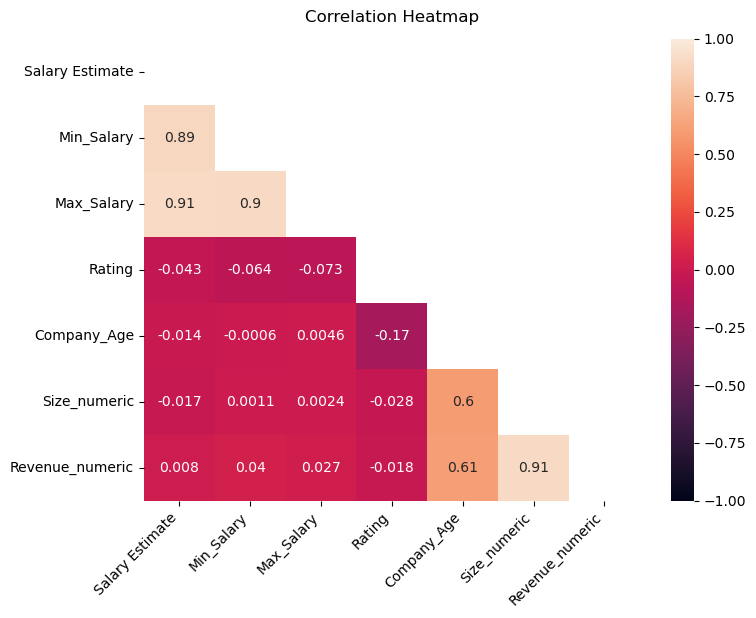

In [48]:
# set the range of values to be displayed on the colormap from -1 to 1, 
# set the annotation to True to display the correlation values on the heatmap

plt.figure(figsize=(8, 6))

# define the mask to set the values in the upper triangle to True
cols = ['Salary Estimate', 'Min_Salary', 'Max_Salary', 'Rating', 'Company_Age', 'Size_numeric', 'Revenue_numeric']
mask = np.triu(cleaned_df[cols].corr())

heatmap = sns.heatmap(cleaned_df[cols].corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.xticks(rotation=45, ha='right') # rotate x-axis label

The correlation heatmap shows that company age, company size and revenue are linearly correlated.

## Pivot table for Salary Estimate,  Company Size VS Revenue

In [49]:
cleaned_df['Size'] = cleaned_df['Size'].astype(pd.api.types.CategoricalDtype(categories=[
    '1 to 50 employees', '51 to 200 employees', '201 to 500 employees', '501 to 1000 employees',
    '1001 to 5000 employees', '5001 to 10000 employees', '10000+ employees']))

In [50]:
cleaned_df['Revenue'] = cleaned_df['Revenue'].astype(pd.api.types.CategoricalDtype(categories=[
    'Less than $1 million (USD)', '$1 to $5 million (USD)', '$5 to $10 million (USD)', 
    '$10 to $25 million (USD)', '$25 to $50 million (USD)', '$50 to $100 million (USD)',
    '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
    '$1 to $2 billion (USD)', '$2 to $5 billion (USD)',
    '$5 to $10 billion (USD)', '$10+ billion (USD)']))

In [51]:
pivtab = pd.pivot_table(cleaned_df, values='Salary Estimate', 
                        index=['Revenue'], columns=['Size'], aggfunc='median')
pivtab

Size                              1 to 50 employees  51 to 200 employees  \
Revenue                                                                    
Less than $1 million (USD)                 109000.0             111000.0   
$1 to $5 million (USD)                     113000.0             122000.0   
$5 to $10 million (USD)                    102000.0             118000.0   
$10 to $25 million (USD)                   107000.0             128500.0   
$25 to $50 million (USD)                        NaN             126000.0   
$50 to $100 million (USD)                  119000.0             114000.0   
$100 to $500 million (USD)                      NaN             134500.0   
$500 million to $1 billion (USD)                NaN                  NaN   
$1 to $2 billion (USD)                          NaN                  NaN   
$2 to $5 billion (USD)                          NaN                  NaN   
$5 to $10 billion (USD)                         NaN                  NaN   
$10+ billion (USD)                              NaN                  NaN   

Size                              201 to 500 employees  501 to 1000 employees  \
Revenue                                                                         
Less than $1 million (USD)                         NaN                    NaN   
$1 to $5 million (USD)                        101000.0                    NaN   
$5 to $10 million (USD)                       181000.0                    NaN   
$10 to $25 million (USD)                      105000.0                    NaN   
$25 to $50 million (USD)                      106000.0               109000.0   
$50 to $100 million (USD)                     101500.0                82500.0   
$100 to $500 million (USD)                    120000.0               113500.0   
$500 million to $1 billion (USD)              131000.0               112000.0   
$1 to $2 billion (USD)                        140500.0                    NaN   
$2 to $5 billion (USD)                             NaN                91000.0   
$5 to $10 billion (USD)                            NaN                    NaN   
$10+ billion (USD)                                 NaN                    NaN   

Size                              1001 to 5000 employees  \
Revenue                                                    
Less than $1 million (USD)                           NaN   
$1 to $5 million (USD)                               NaN   
$5 to $10 million (USD)                              NaN   
$10 to $25 million (USD)                        109000.0   
$25 to $50 million (USD)                        114000.0   
$50 to $100 million (USD)                       112000.0   
$100 to $500 million (USD)                      119000.0   
$500 million to $1 billion (USD)                123500.0   
$1 to $2 billion (USD)                          122000.0   
$2 to $5 billion (USD)                          119500.0   
$5 to $10 billion (USD)                         113000.0   
$10+ billion (USD)                              112000.0   

Size                              5001 to 10000 employees  10000+ employees  
Revenue                                                                      
Less than $1 million (USD)                            NaN               NaN  
$1 to $5 million (USD)                                NaN               NaN  
$5 to $10 million (USD)                               NaN          105000.0  
$10 to $25 million (USD)                              NaN               NaN  
$25 to $50 million (USD)                              NaN               NaN  
$50 to $100 million (USD)                             NaN               NaN  
$100 to $500 million (USD)                        99000.0               NaN  
$500 million to $1 billion (USD)                 107000.0               NaN  
$1 to $2 billion (USD)                           137000.0          101500.0  
$2 to $5 billion (USD)                           125000.0          130500.0  
$5 to $10 billion (USD)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Less than $1 million (USD)'),
  Text(1, 0, '$1 to $5 million (USD)'),
  Text(2, 0, '$5 to $10 million (USD)'),
  Text(3, 0, '$10 to $25 million (USD)'),
  Text(4, 0, '$25 to $50 million (USD)'),
  Text(5, 0, '$50 to $100 million (USD)'),
  Text(6, 0, '$100 to $500 million (USD)'),
  Text(7, 0, '$500 million to $1 billion (USD)'),
  Text(8, 0, '$1 to $2 billion (USD)'),
  Text(9, 0, '$2 to $5 billion (USD)'),
  Text(10, 0, '$5 to $10 billion (USD)'),
  Text(11, 0, '$10+ billion (USD)')])

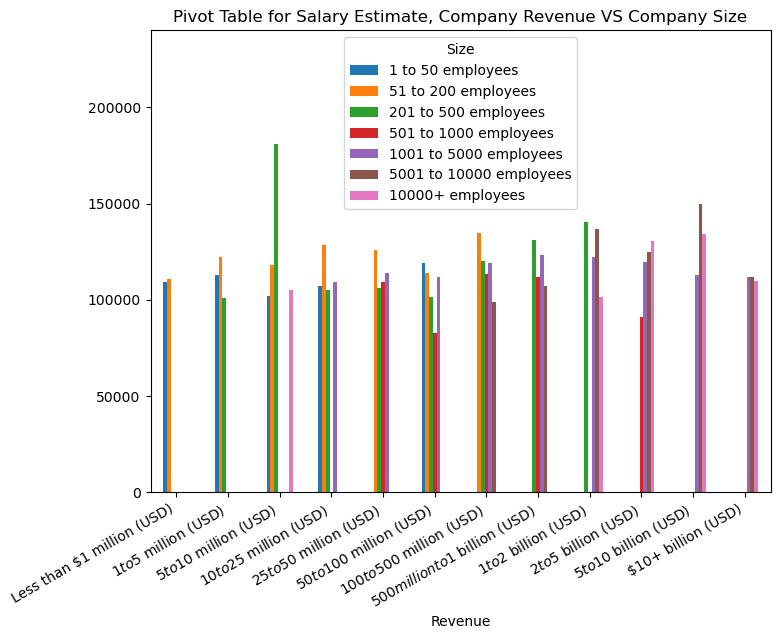

In [52]:
pivtab.plot(kind='bar', figsize=(8, 6))

plt.title('Pivot Table for Salary Estimate, Company Revenue VS Company Size', fontsize=12)
plt.ylim(0, 240000)
plt.xticks(rotation=30, ha='right')

A company with larger size and number of employees usually have higher revenue, which is reflected by correlation heatmap, but it does not show that data science positions have higher median salary accordingly. 

## Scatter Plot for Salary Estimate, Company Age and Rating

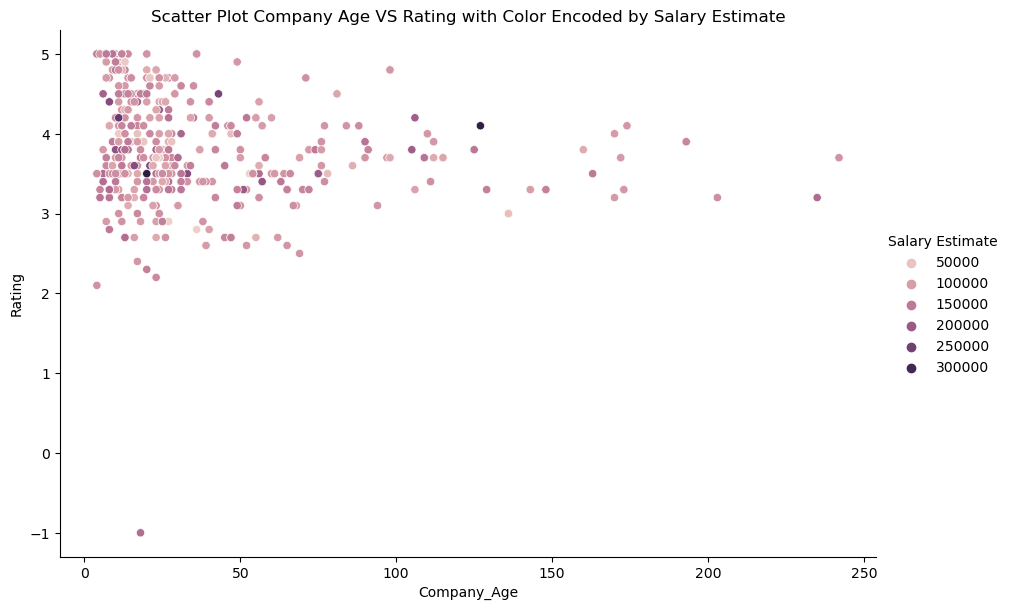

In [53]:
sns.relplot(data=cleaned_df, x='Company_Age', y='Rating', hue='Salary Estimate', kind='scatter', height=6, aspect=1.5)
plt.title('Scatter Plot Company Age VS Rating with Color Encoded by Salary Estimate', fontsize=12)
plt.show()

Same as what reflected from the correlation heatmap, there is no significant pattern showing the relationship between company's rating, age and estimated salary.

## Wordcloud for Job Descriptions

In [54]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

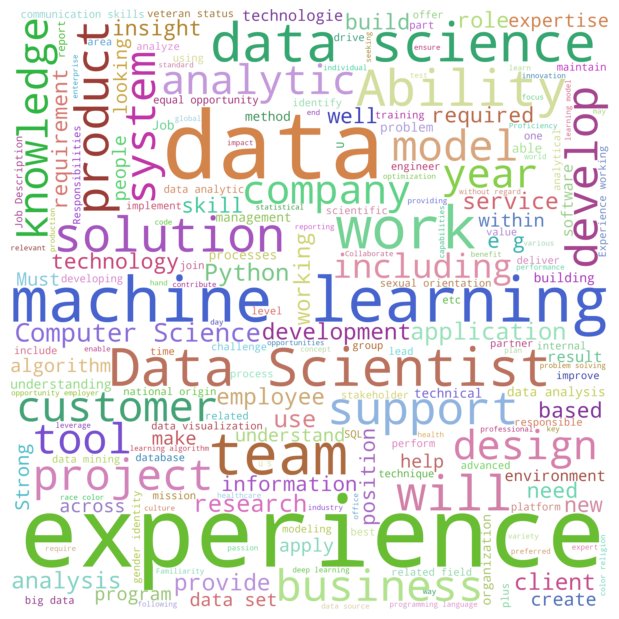

In [55]:
# define a custom color function
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({}, {}%, {}%)".format(random.randint(0, 360), random.randint(40, 60), random.randint(40, 75))

# create a WordCloud instance with custom colors
words = ' '.join(df['Job Description'])
wordcloud = WordCloud(width=3000, height=3000, color_func=color_func,
                      background_color='white').generate(words)

# display the word cloud using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

From the above generated wordcloud, we can intuitively see that the most frequently words appearing in data science job descriptions are Experience, data, machine learning, solution, ability, etc.

## Top important technical skills required for different job titles

In [56]:
# capitalize key_words list using list comprehension

key_words = [word.capitalize() for word in key_words]

In [57]:
round(cleaned_df[['Job Title'] + key_words].groupby('Job Title')[key_words].sum()/cleaned_df[['Job Title'] + key_words].groupby('Job Title')[key_words].count()*100, 2)

Python     Sql  Excel  Tableau  Power bi  Hadoop  \
Job Title                                                                     
Data Analyst                75.00   83.33  83.33    58.33      8.33    8.33   
Data Engineer               84.62   84.62  53.85     3.85      7.69   42.31   
Data Scientist              80.12   59.35  45.10    21.36      5.64   21.96   
Machine Learning Engineer   81.25   18.75  25.00     0.00      0.00   18.75   
Other                       60.16   40.64  41.83    14.34      4.78   16.73   
Senior Data Analyst        100.00  100.00  33.33    50.00      0.00   33.33   
Senior Data Engineer       100.00   60.00  20.00    20.00      0.00   60.00   
Senior Data Scientist       78.95   52.63  42.11    15.79      0.00   36.84   

                           Spark    Aws  Big data  
Job Title                                          
Data Analyst                8.33   0.00      8.33  
Data Engineer              30.77  57.69     38.46  
Data Scientist             28.78  24.93     21.66  
Machine Learning Engineer  18.75  18.75      6.25  
Other                      26.69  26.29     15.54  
Senior Data Analyst        33.33   0.00     33.33  
Senior Data Engineer       80.00  60.00     40.00  
Senior Data Scientist      36.84  15.79     57.89

From the calculated percentages, we conclude that skills like Python, SQL, and Excel are highly required.